# Import Dependencies

In [1]:
import numpy as np
import gym
from gym import spaces
from gym.spaces import MultiDiscrete
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import time
from stable_baselines3.common.env_checker import check_env

In [2]:
m_sq = np.array([
    [16, 3, 2, 13],
    [5, 10, 11, 8],
    [9, 6, 7, 12],
    [4, 15, 14, 1]
])

rand_sq = np.arange(1,17)

np.random.shuffle(rand_sq)

rand_sq = rand_sq.reshape((4,4))

n4_square = np.arange(1,17).reshape((4,4))


r1 = np.random.choice(np.arange(1,17), 16, replace=False).reshape([4,4])
r1

array([[ 6, 12,  5,  9],
       [10, 11,  3,  4],
       [ 8, 13, 16,  1],
       [14,  7, 15,  2]])

# Calculate the constant:

The magic constant for an nth order general magic square starting with an integer A and with entries in an increasing arithmetic series with difference D between terms is

$M_2(n; A, D) = \frac{1}{n} [2a + D(n^2-1)]
$

In [3]:
def score_square(input_array, start_int, step):
    # Calculate constant
    n = input_array.shape[0]
    constant = (.5*n) * ( (2*start_int) + (step * ((n**2)-1)))
    
    # Calculate distances from constant
    row_sums = input_array.sum(axis=0)
    col_sums = input_array.sum(axis=1)
    diag_sums = np.array([
        np.diag(input_array).sum(),
        np.diag(np.fliplr(input_array)).sum()
    ])
    quadrants = [q for top_and_bot in np.split(input_array,2, axis = 0) 
               for q in np.split(top_and_bot,2, axis = 1)]
    quad_sums = np.array([i.sum() for i in quadrants])
    
    # Store distances in dict
    all_sums = {
        "row": row_sums,
        "col": col_sums,
        "diag": diag_sums,
        "quad": quad_sums
    }
    
    # sum all the distances from constant
    total_dist = np.array([np.abs(constant - i).sum() for i in all_sums.values()]).sum()
    print(total_dist)
    # calculate reward 
    
    # TO DO:
    # calculate max distance 
    max_dist =  144
    scaled_dist = 1 - (total_dist / max_dist)
    return (scaled_dist, all_sums)
#score_square(n4_square, 1, 1)

In [4]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    #cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    #cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
     #        rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im #, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

84.0


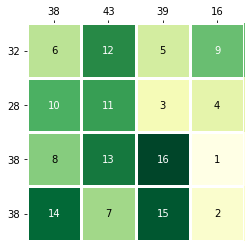

In [5]:
test_input = r1

reward, info = score_square(test_input,1,1)

fig, ax = plt.subplots()

im = heatmap(test_input, info['col'], info['row'], 
                   ax = ax, cmap = 'YlGn'
                   )
texts = annotate_heatmap(im, valfmt="{x:}")

# Create Environment

In [9]:
class magic_env(gym.Env):
    metadata = {'render.modes': ['human']}
    def __init__(self):
        
        # Actions we can take
        self.action_space = spaces.MultiDiscrete([4,4,4,4]) # switch element at x,y with element at x,y

        # Observed Square Array
        self.observation_space = spaces.Box(low = 1, high= 16, shape=(4,4), dtype=np.int32)

        # Set starting square
        self.state = np.random.choice(np.arange(1,17), 16, replace=False).reshape([4,4])

        # Set Game length
        self.turns_left = 500

    def step(self, action):
        # apply action
        def swap_elements(input_array, xyxy):
            # subtract 1 for indexing
            i = xyxy 
            #swap elements
            seq = input_array
            seq[i[0]][i[1]], seq[i[2]][i[3]] = seq[i[2]][i[3]], seq[i[0]][i[1]]
            return seq
        
        self.state = swap_elements(self.state, action)

        # Reduce turns left 
        self.turns_left -= 1

        # Calculate reward
        reward, info = score_square(self.state,1,1)

        # Check if game over
        if self.turns_left <= 0:
            done = True
        else:
            done = False

        return self.state, reward, done
    
    def reset(self):
        self.state = np.random.choice(np.arange(1,17), 16, replace=False).reshape([4,4])
        self.turns_left = 500
        return self.state
    
    def render(self, mode='human'):
        reward, info = score_square(self.state,1,1)
        
        fig, ax = plt.subplots()

        im = heatmap(self.state, info['col'], info['row'], 
                        ax = ax, cmap = 'YlGn')
        
        texts = annotate_heatmap(im, valfmt="{x:}")

In [10]:
env = magic_env()

check_env(env)

C:\Users\olive\anaconda3\envs\bl_env\lib\site-packages\stable_baselines3\common\env_checker.py:130: UserWarning: Your observation  has an unconventional shape (neither an image, nor a 1D vector). We recommend you to flatten the observation to have only a 1D vector or use a custom policy to properly process the data.
  warnings.warn(


97.0


AssertionError: The `step()` method must return four values: obs, reward, done, info

106.0


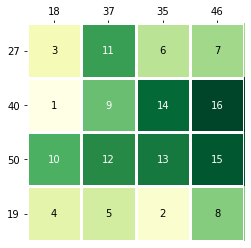

In [16]:
env.render()

94.0
74.0
74.0
76.0
76.0
92.0
92.0
100.0
100.0
96.0
96.0
120.0
120.0
124.0
124.0
124.0
124.0
84.0
84.0
78.0
78.0
94.0
94.0
86.0
86.0
80.0
80.0
86.0
86.0
87.0
87.0
98.0
98.0
114.0
114.0
98.0
98.0
98.0
98.0
91.0
91.0
91.0
91.0
78.0
78.0
86.0
86.0


C:\Users\olive\AppData\Local\Temp\ipykernel_6060\2907324087.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


70.0
70.0
82.0
82.0
82.0
82.0
91.0
91.0
89.0
89.0
89.0
89.0
89.0
89.0
105.0
105.0
105.0
105.0
102.0
102.0
114.0
114.0
124.0
124.0
112.0
112.0
96.0
96.0
98.0
98.0
92.0
92.0
98.0
98.0
106.0
106.0
78.0
78.0
78.0
78.0
56.0
56.0
60.0
60.0
78.0
78.0
82.0
82.0
96.0
96.0
78.0
78.0
108.0
108.0
102.0
102.0
102.0
102.0
114.0
114.0
110.0
110.0
85.0
85.0
96.0
96.0
95.0
95.0
81.0
81.0
85.0
85.0
95.0
95.0
88.0
88.0
84.0
84.0
94.0
94.0
69.0
69.0
68.0
68.0
70.0
70.0
68.0
68.0
72.0
72.0
74.0
74.0
66.0
66.0
64.0
64.0
56.0
56.0
98.0
98.0
56.0
56.0
56.0
56.0
80.0
80.0
102.0
102.0
122.0
122.0
124.0
124.0
112.0
112.0
112.0
112.0
112.0
112.0
112.0
112.0
104.0
104.0
120.0
120.0
123.0
123.0
125.0
125.0
91.0
91.0
93.0
93.0
105.0
105.0
85.0
85.0
87.0
87.0
92.0
92.0
76.0
76.0
88.0
88.0
94.0
94.0
94.0
94.0
98.0
98.0
105.0
105.0
105.0
105.0
121.0
121.0
121.0
121.0
120.0
120.0
120.0
120.0
114.0
114.0
114.0
114.0
114.0
114.0
106.0
106.0
92.0
92.0
70.0
70.0
71.0
71.0
63.0
63.0
63.0
63.0
60.0
60.0
63.0
63.0
70.0
70.0
70

KeyboardInterrupt: 

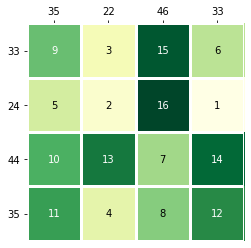

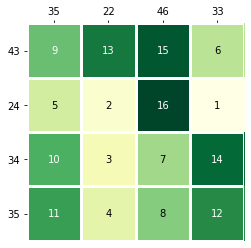

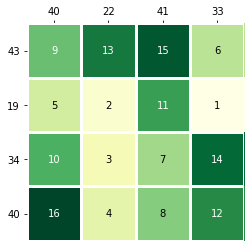

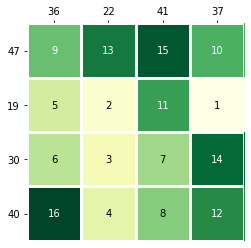

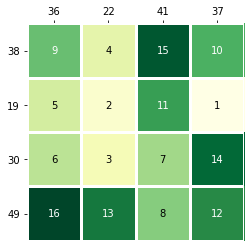

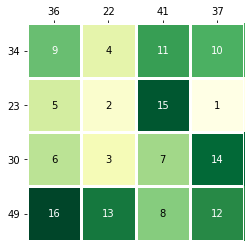

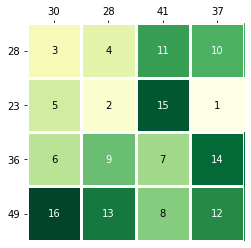

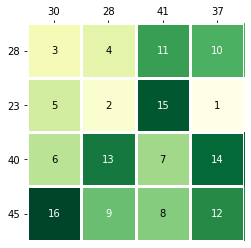

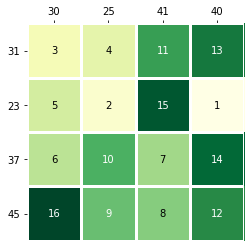

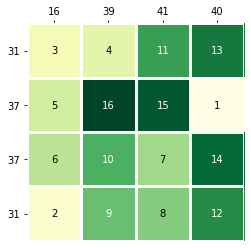

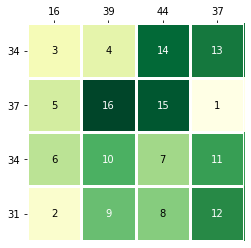

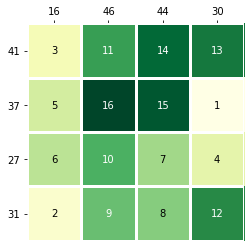

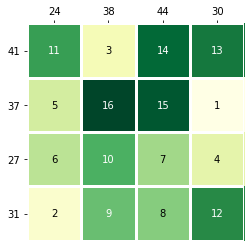

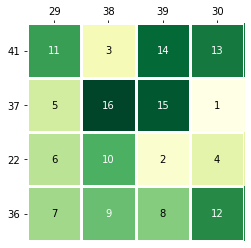

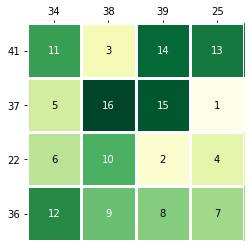

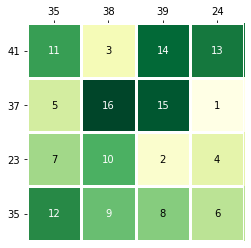

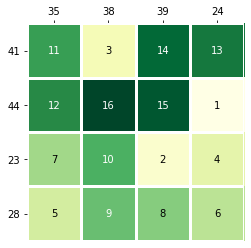

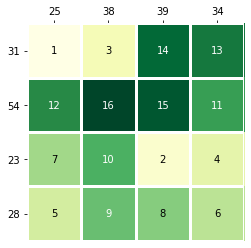

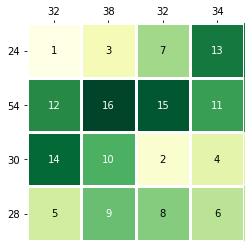

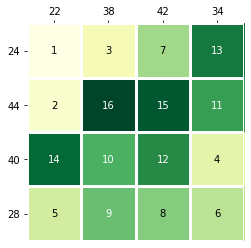

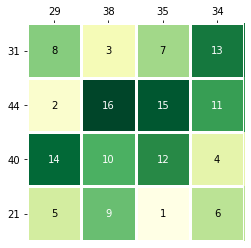

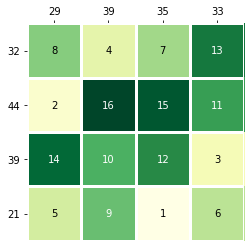

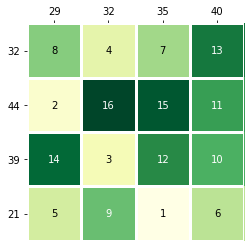

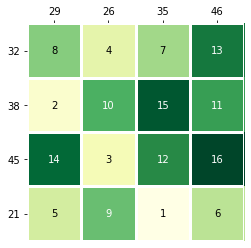

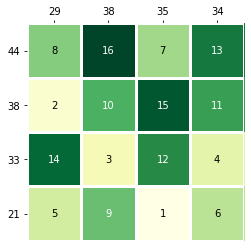

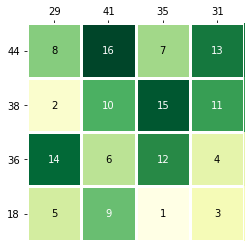

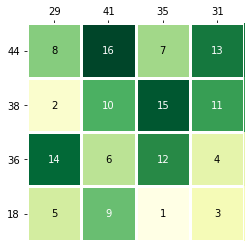

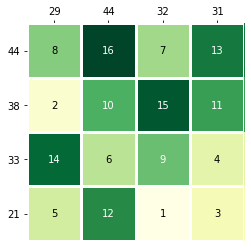

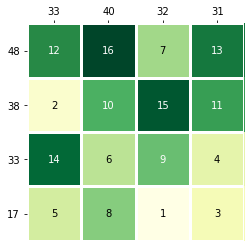

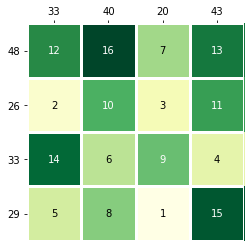

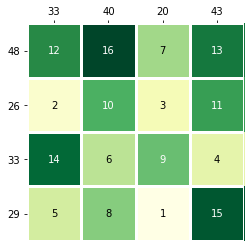

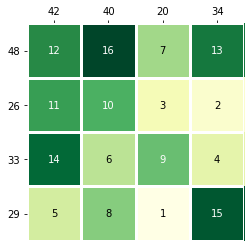

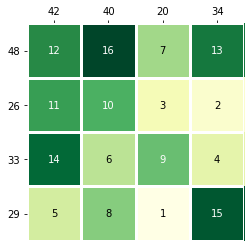

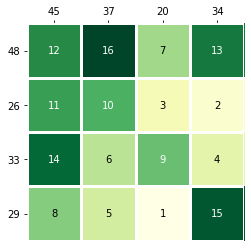

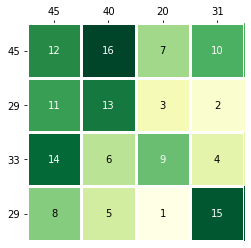

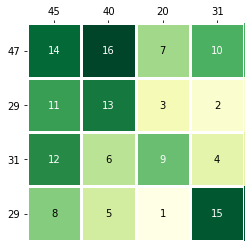

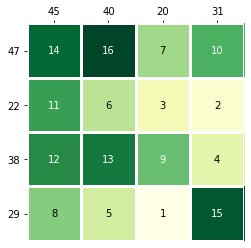

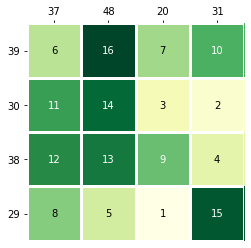

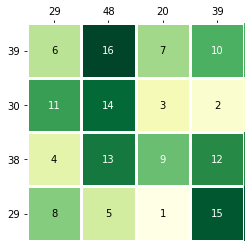

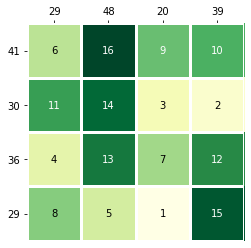

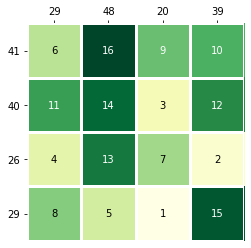

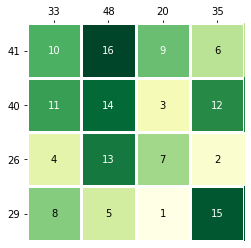

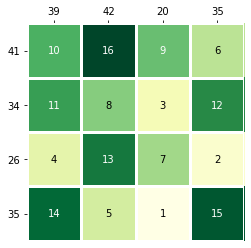

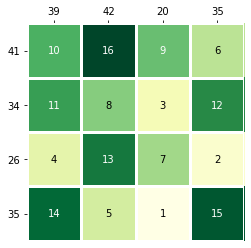

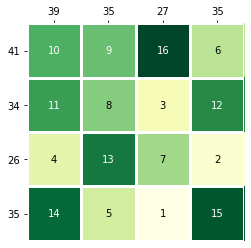

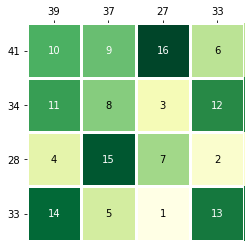

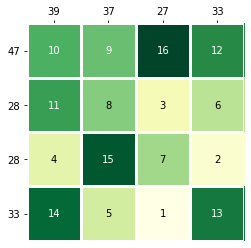

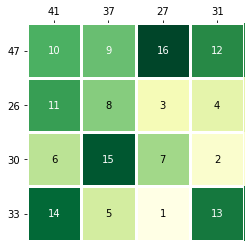

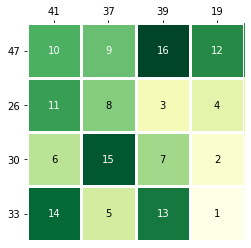

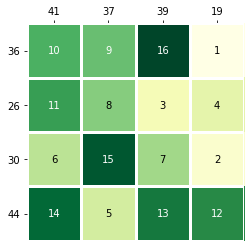

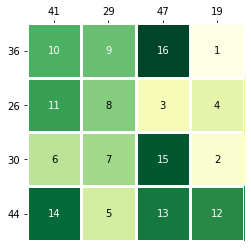

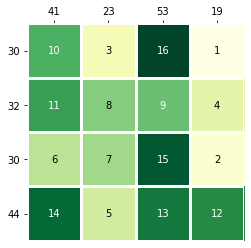

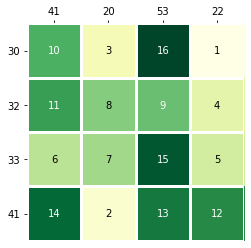

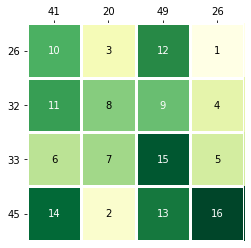

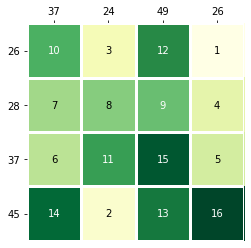

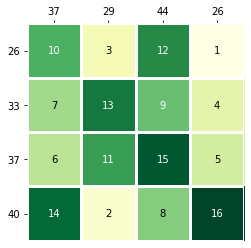

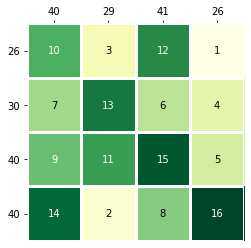

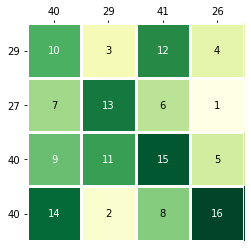

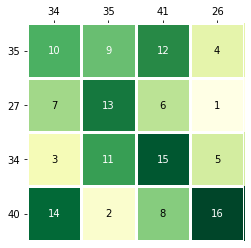

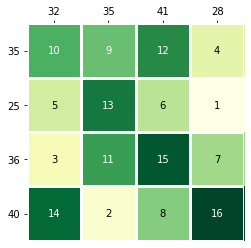

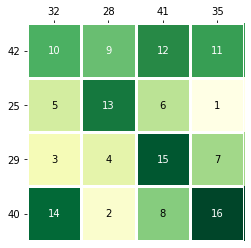

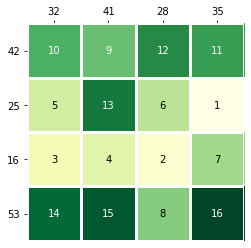

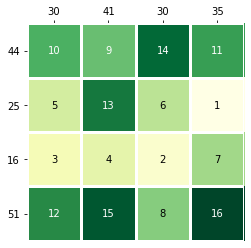

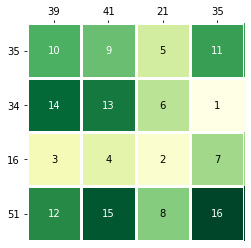

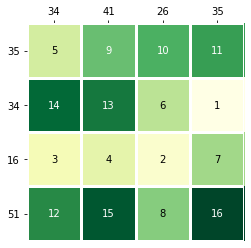

In [29]:
episodes = 2
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0

    while not done:
        env.render(mode = 'human')
        time.sleep(.01)
        action = env.action_space.sample()
        n_state, reward, done = env.step(action)
        score += reward
    
    print('Episode:{} Score:{}'.format(episode, score))

# Create Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
states = env.observation_space.shape
actions = env.action_space.shape
actions

In [ ]:
env.action_space.sample()